In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def f_pdf(X, mean, covariance):

    k = len(mean)
    constant = 1 / ((2 * np.pi) ** (k / 2) * np.linalg.det(covariance) ** 0.5)
    deviation = X - mean
    exponent = -0.5 * np.sum(np.dot(deviation, np.linalg.inv(covariance)) * deviation, axis=1)
    return constant * np.exp(exponent)

In [ ]:
def expectation_step(X, means, covariances, mixing_coefficients):
    K = len(means)
    N = len(X)
    responsibilities = np.zeros((N, K))

    for k in range(K):
        responsibilities[:, k] = mixing_coefficients[k] * f_pdf(X, means[k], covariances[k])

    responsibilities /= np.sum(responsibilities, axis=1)[:, np.newaxis]


    return responsibilities

In [ ]:
def initialize_parameters_with_kmeans(X, K):
    # Run K-means to find cluster centroids
    kmeans = KMeans(n_clusters=K)
    kmeans.fit(X)
    cluster_centers = kmeans.cluster_centers_

    initial_means = cluster_centers

    initial_covariances = []
    for i in range(K):

        cluster_data = X[kmeans.labels_ == i]
        covariance_matrix = np.cov(cluster_data, rowvar=False)

        initial_covariances.append(covariance_matrix)

    initial_covariances = np.array(initial_covariances)

    initial_mixing_coefficients = np.ones(K) / K

    return initial_means, initial_covariances, initial_mixing_coefficients

In [ ]:
def expectation_step(X, means, covariances, mixing_coefficients):
    K = len(means)
    N = len(X)
    responsibilities = np.zeros((N, K))

    for k in range(K):
        responsibilities[:, k] = mixing_coefficients[k] * f_pdf(X, means[k], covariances[k])

    # Normalize responsibilities
    responsibilities /= np.sum(responsibilities, axis=1)[:, np.newaxis]


    return responsibilities

In [ ]:
def maximization_step(X, responsibilities):
    N, D = X.shape
    K = responsibilities.shape[1]

    mixing_coefficients = np.mean(responsibilities, axis=0)

    means = np.dot(responsibilities.T, X) / np.sum(responsibilities, axis=0)[:, np.newaxis]

    covariances = np.zeros((K, D, D))
    for k in range(K):
        deviation = X - means[k]
        covariances[k] = np.dot(responsibilities[:, k] * deviation.T, deviation) / np.sum(responsibilities[:, k])

    return means, covariances, mixing_coefficients

In [ ]:
def EM_algorithm(X, initial_means, initial_covariances, initial_mixing_coefficients, max_iter=100):
    means = initial_means
    covariances = initial_covariances
    mixing_coefficients = initial_mixing_coefficients

    # Collect likelihoods at each step
    likelihoods = []
    for _ in range(max_iter):
        # E-step
        responsibilities = expectation_step(X, means, covariances, mixing_coefficients)


        # M-step
        new_means, new_covariances, new_mixing_coefficients = maximization_step(X, responsibilities)

        #likelihood

        log_likelihood = np.sum(np.log(np.sum(new_means, axis=1)))
        likelihoods.append(log_likelihood)

        means = new_means
        covariances = new_covariances
        mixing_coefficients = new_mixing_coefficients

    return means, covariances, mixing_coefficients, likelihoods

In [ ]:

N = 300

mean1 = np.array([3, 4])
cov1 = np.array([[1, 0], [0, 2]])

mean2 = np.array([6, 8])
cov2 = np.array([[2, 0], [0, 1]])

mean3 = np.array([7, 3])
cov3 = np.array([[2, 1], [1, 2]])

samples1 = np.random.multivariate_normal(mean1, cov1, size=N)
samples2 = np.random.multivariate_normal(mean2, cov2, size=N)
samples3 = np.random.multivariate_normal(mean3, cov3, size=N)

D = np.concatenate((samples1, samples2, samples3))
np.random.shuffle(D)

K = 3
initial_means, initial_covariances, initial_mixing_coefficients = initialize_parameters_with_kmeans(D, K)
means, covariances, mixing_coefficients, likelihoods = EM_algorithm(D, initial_means, initial_covariances, initial_mixing_coefficients)
print('Means')
print(means)

Means
[[3.09321806 4.0108275 ]
 [7.01793521 2.91178709]
 [6.17379784 8.05567964]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:

responsibilities = expectation_step(D, means, covariances, mixing_coefficients)
labels = np.argmax(responsibilities, axis=1)


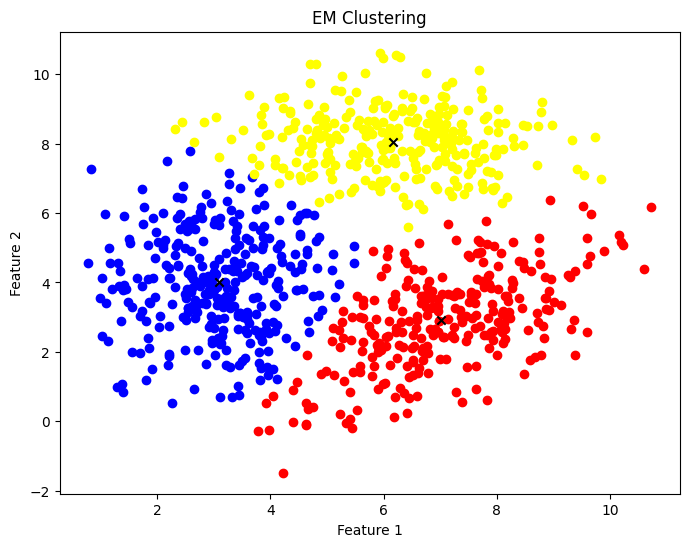

In [ ]:

plt.figure(figsize=(8, 6))
c =['blue','red','yellow']
for k in range(K):
    cluster_points = D[labels == k]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {k + 1}',color = c[k])

plt.scatter(means[:, 0], means[:, 1], color='black', marker='x', label='Cluster Centers')
plt.title('EM Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


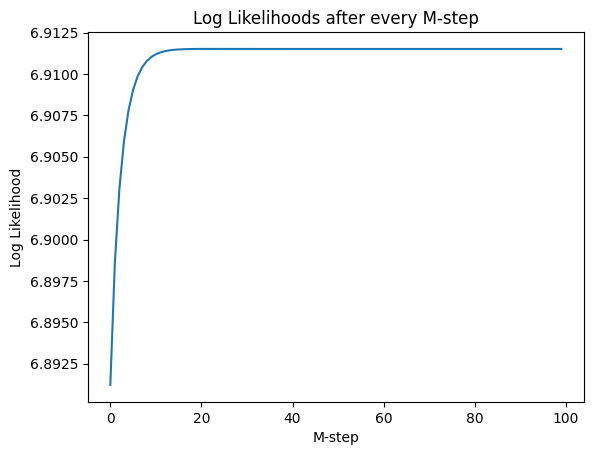

In [ ]:

# Plotting log likelihoods
plt.plot(likelihoods)
plt.title('Log Likelihoods after every M-step')
plt.xlabel('M-step')
plt.ylabel('Log Likelihood')
plt.show()
